In [1]:
import pickle
import pycaret
import pandas as pd
import seaborn as sns
import preprocessing_functions
from sklearn import preprocessing
from pycaret.classification import *

Stage of behavior prediction

In [2]:
data = pd.read_pickle('data/fitbit_ttm_to_model.pkl')
data

id       date  nightly_temperature  nremhr  \
0     621e2e8e67b776a24055b564 2021-05-24            34.137687  57.432   
1     621e2e8e67b776a24055b564 2021-05-25            33.794544  57.681   
2     621e2e8e67b776a24055b564 2021-05-26            34.611011  57.481   
3     621e2e8e67b776a24055b564 2021-05-27            34.408304  57.493   
4     621e2e8e67b776a24055b564 2021-05-28            34.178922  56.750   
...                        ...        ...                  ...     ...   
3642  621e339967b776a240e502de 2022-01-13            33.816660  51.760   
3643  621e339967b776a240e502de 2022-01-14            34.460723  51.351   
3644  621e339967b776a240e502de 2022-01-15            34.137341  50.504   
3645  621e339967b776a240e502de 2022-01-16            34.406884  51.533   
3646  621e339967b776a240e502de 2022-01-17            34.197504     NaN   

        rmssd  spo2  full_sleep_breathing_rate  stress_score  \
0      89.603   NaN                       14.8          78.0   
1      94.303   NaN                       15.8          80.0   
2     119.212   NaN                       14.6          84.0   
3     111.709   NaN                       14.8          82.0   
4     103.034   NaN                       15.2          81.0   
...       ...   ...                        ...           ...   
3642   47.281  96.7                       11.6          79.0   
3643   45.883  95.7                       12.0          79.0   
3644   49.779  95.7                       12.0          78.0   
3645   45.322  94.5                       11.6          73.0   
3646      NaN  95.7                       11.4          84.0   

      sleep_points_percentage  exertion_points_percentage  \
0                    0.833333                       0.675   
1                    0.833333                       0.725   
2                    0.966667                       0.725   
3                    0.933333                       0.725   
4                    0.866667                       0.725   
...                       ...                         ...   
3642                 0.700000                       0.725   
3643                 0.766667                       0.775   
3644                 0.833333                       0.700   
3645                 0.700000                       0.725   
3646                 0.900000                       0.700   

      responsiveness_points_percentage  daily_temperature_variation  calories  \
0                             0.866667                    -1.788325   2351.59   
1                             0.866667                    -2.462709   2332.08   
2                             0.866667                    -2.385801   2262.30   
3                             0.833333                    -2.124199   2325.10   
4                             0.866667                    -2.396873   2586.76   
...                                ...                          ...       ...   
3642                          0.966667                    -1.793898   1596.35   
3643                          0.833333                    -0.705708   1330.51   
3644                          0.833333                    -1.229213   1513.08   
3645                          0.766667                    -1.643875   1600.42   
3646                          0.966667                    -0.575304    805.19   

      filteredDemographicVO2Max  distance        bpm  lightly_active_minutes  \
0                      62.79210    6517.5  71.701565                   149.0   
1                      62.67912    7178.6  70.579300                   132.0   
2                      62.57307    6090.9  71.842573                   112.0   
3                      62.47493    6653.1  71.725477                   133.0   
4                      62.41166    9557.9  74.401028                   136.0   
...                         ...       ...        ...                     ...   
3642                   48.76235    5522.1  67.283493                   122.0   
3643                   4

In [3]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

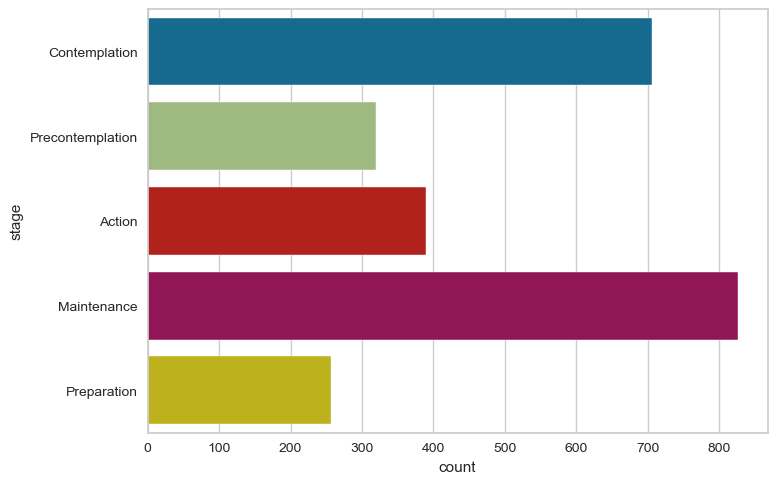

In [4]:
sns.countplot(y="stage", data=train_data)

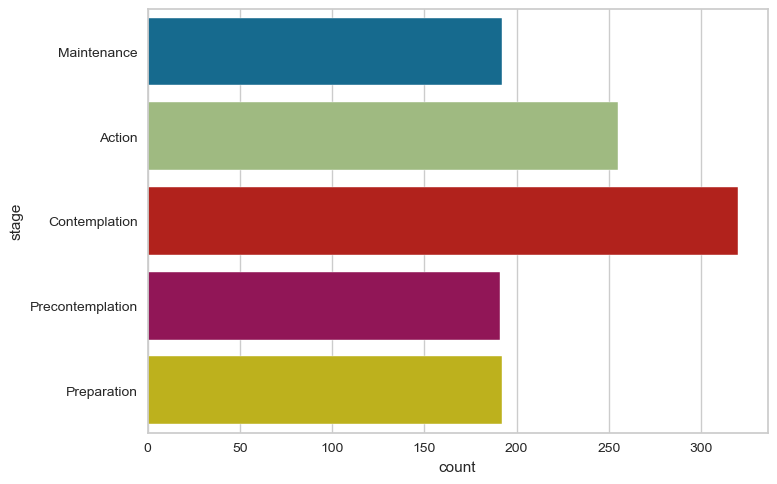

In [5]:
sns.countplot(y="stage", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='stage', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [8]:
best = compare_models(errors="raise")

In [9]:
best

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

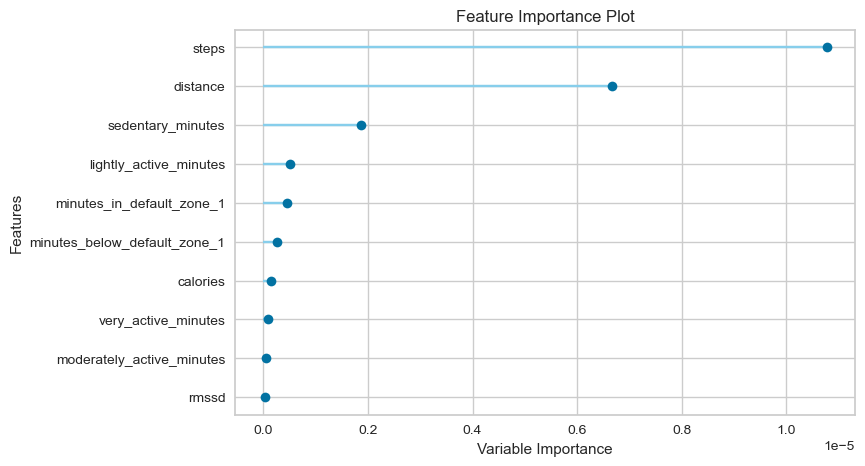

In [10]:
plot_model(best, plot='feature')

Breq self-determination prediction

In [11]:
data = pd.read_pickle('data/fitbit_breq_to_model.pkl')
data

id       date  nightly_temperature  nremhr  \
0     621e2e8e67b776a24055b564 2021-05-24            34.137687  57.432   
1     621e2e8e67b776a24055b564 2021-05-25            33.794544  57.681   
2     621e2e8e67b776a24055b564 2021-05-26            34.611011  57.481   
3     621e2e8e67b776a24055b564 2021-05-27            34.408304  57.493   
4     621e2e8e67b776a24055b564 2021-05-28            34.178922  56.750   
...                        ...        ...                  ...     ...   
3578  621e339967b776a240e502de 2022-01-13            33.816660  51.760   
3579  621e339967b776a240e502de 2022-01-14            34.460723  51.351   
3580  621e339967b776a240e502de 2022-01-15            34.137341  50.504   
3581  621e339967b776a240e502de 2022-01-16            34.406884  51.533   
3582  621e339967b776a240e502de 2022-01-17            34.197504     NaN   

        rmssd  spo2  full_sleep_breathing_rate  stress_score  \
0      89.603   NaN                       14.8          78.0   
1      94.303   NaN                       15.8          80.0   
2     119.212   NaN                       14.6          84.0   
3     111.709   NaN                       14.8          82.0   
4     103.034   NaN                       15.2          81.0   
...       ...   ...                        ...           ...   
3578   47.281  96.7                       11.6          79.0   
3579   45.883  95.7                       12.0          79.0   
3580   49.779  95.7                       12.0          78.0   
3581   45.322  94.5                       11.6          73.0   
3582      NaN  95.7                       11.4          84.0   

      sleep_points_percentage  exertion_points_percentage  ...  Run  Spinning  \
0                    0.833333                       0.675  ...  0.0       0.0   
1                    0.833333                       0.725  ...  0.0       0.0   
2                    0.966667                       0.725  ...  0.0       0.0   
3                    0.933333                       0.725  ...  0.0       0.0   
4                    0.866667                       0.725  ...  0.0       0.0   
...                       ...                         ...  ...  ...       ...   
3578                 0.700000                       0.725  ...  1.0       0.0   
3579                 0.766667                       0.775  ...  NaN       NaN   
3580                 0.833333                       0.700  ...  0.0       0.0   
3581                 0.700000                       0.725  ...  0.0       0.0   
3582                 0.900000                       0.700  ...  NaN       NaN   

      Sport  Swim  Treadmill  Walk  Weights  Workout  Yoga/Pilates  \
0       0.0   0.0        0.0   1.0      0.0      0.0           0.0   
1       0.0   0.0        0.0   1.0      0.0      0.0           0.0   
2       0.0   0.0        0.0   1.0      0.0      0.0           0.0   
3       0.0   0.0        0.0   1.0      0.0      0.0           0.0   
4       0.0   0.0        0.0   1.0      0.0      0.0           0.0   
...     ...   ...        ...   ...      ...      ...           ...   
3578    0.0   0.0        0.0   0.0      0.0      0.0           0.0   
3579    NaN   NaN        NaN   NaN      NaN      NaN           NaN   
3580    0.0   0.0        0.0   0.0      0.0      0.0           0.0   
3581    0.0   0.0        0.0   0.0      0.0      0.0           0.0   
3582    NaN   NaN        NaN   NaN      NaN      NaN           NaN   

      breq_self_determination  
0        intrinsic_regulation  
1        intrinsic_regulation  
2        intrinsic_regulation  
3        intrinsic_regulation  
4        intrinsic_regulation  
...                       ...  
3578    identified_regulation  
3579    identified_regulation  
3580    identified_regulation  
3581    identified_regulation  
3582    identified_regulation  

[3583 rows x 65 columns]

In [12]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

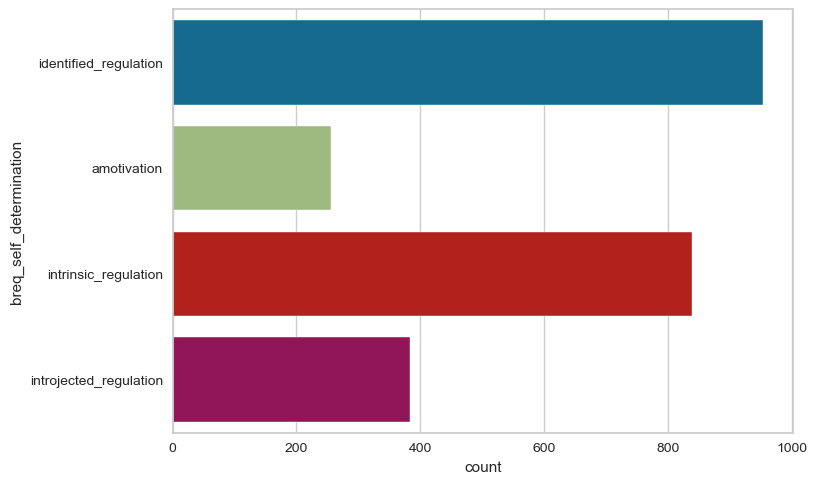

In [13]:
sns.countplot(y="breq_self_determination", data=train_data)

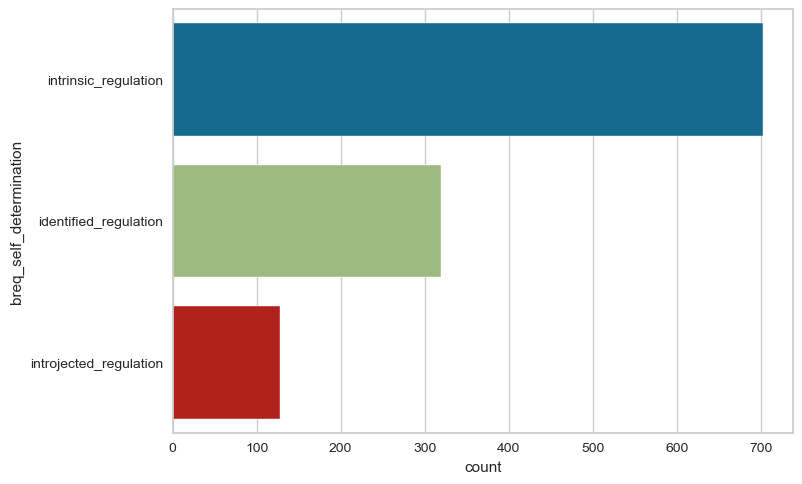

In [14]:
sns.countplot(y="breq_self_determination", data=test_data)

In [15]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [16]:
s = setup(data=train_data, target='breq_self_determination', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [17]:
best = compare_models(errors="raise")

In [18]:
best

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.001, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1, penalty='l2',
              power_t=0.5, random_state=123, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

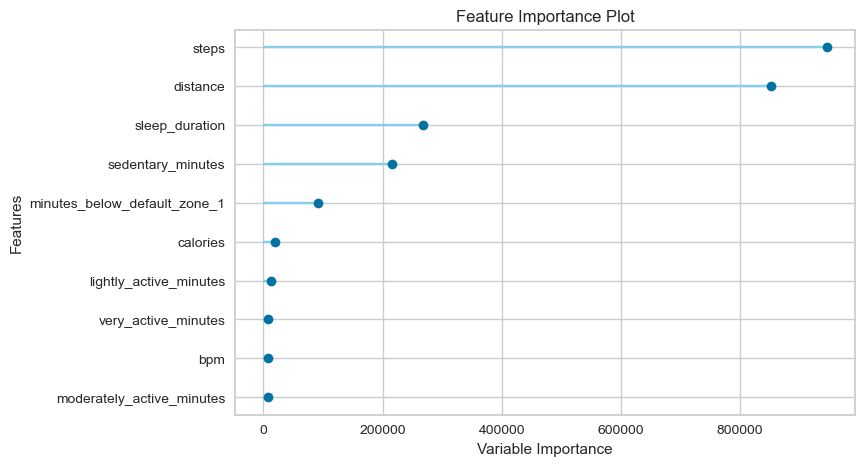

In [19]:
plot_model(best, plot='feature')

Big-5 personality prediction

In [43]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')
data

id       date  nightly_temperature  nremhr  \
0     621e2e8e67b776a24055b564 2021-05-24            34.137687  57.432   
1     621e2e8e67b776a24055b564 2021-05-25            33.794544  57.681   
2     621e2e8e67b776a24055b564 2021-05-26            34.611011  57.481   
3     621e2e8e67b776a24055b564 2021-05-27            34.408304  57.493   
4     621e2e8e67b776a24055b564 2021-05-28            34.178922  56.750   
...                        ...        ...                  ...     ...   
3450  621e339967b776a240e502de 2022-01-13            33.816660  51.760   
3451  621e339967b776a240e502de 2022-01-14            34.460723  51.351   
3452  621e339967b776a240e502de 2022-01-15            34.137341  50.504   
3453  621e339967b776a240e502de 2022-01-16            34.406884  51.533   
3454  621e339967b776a240e502de 2022-01-17            34.197504     NaN   

        rmssd  spo2  full_sleep_breathing_rate  stress_score  \
0      89.603   NaN                       14.8          78.0   
1      94.303   NaN                       15.8          80.0   
2     119.212   NaN                       14.6          84.0   
3     111.709   NaN                       14.8          82.0   
4     103.034   NaN                       15.2          81.0   
...       ...   ...                        ...           ...   
3450   47.281  96.7                       11.6          79.0   
3451   45.883  95.7                       12.0          79.0   
3452   49.779  95.7                       12.0          78.0   
3453   45.322  94.5                       11.6          73.0   
3454      NaN  95.7                       11.4          84.0   

      sleep_points_percentage  exertion_points_percentage  ...  Treadmill  \
0                    0.833333                       0.675  ...        0.0   
1                    0.833333                       0.725  ...        0.0   
2                    0.966667                       0.725  ...        0.0   
3                    0.933333                       0.725  ...        0.0   
4                    0.866667                       0.725  ...        0.0   
...                       ...                         ...  ...        ...   
3450                 0.700000                       0.725  ...        0.0   
3451                 0.766667                       0.775  ...        NaN   
3452                 0.833333                       0.700  ...        0.0   
3453                 0.700000                       0.725  ...        0.0   
3454                 0.900000                       0.700  ...        NaN   

      Walk  Weights  Workout  Yoga/Pilates  ipip_extraversion_category  \
0      1.0      0.0      0.0           0.0                         LOW   
1      1.0      0.0      0.0           0.0                         LOW   
2      1.0      0.0      0.0           0.0                         LOW   
3      1.0      0.0      0.0           0.0                         LOW   
4      1.0      0.0      0.0           0.0                         LOW   
...    ...      ...      ...           ...                         ...   
3450   0.0      0.0      0.0           0.0                     AVERAGE   
3451   NaN      NaN      NaN           NaN                     AVERAGE   
3452   0.0      0.0      0.0           0.0                     AVERAGE   
3453   0.0      0.0      0.0           0.0                     AVERAGE   
3454   NaN      NaN      NaN           NaN                     AVERAGE   

      ipip_agreeableness_category  ipip_conscientiousness_category  \
0                             LOW                             HIGH   
1                             LOW                             HIGH   
2                             LOW                             HIGH   
3                             LOW                             HIGH   
4                             LOW                             HIGH   
...                           ...                              ...   
3450                         HIGH                          AVERAGE

predict extraversion

In [24]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

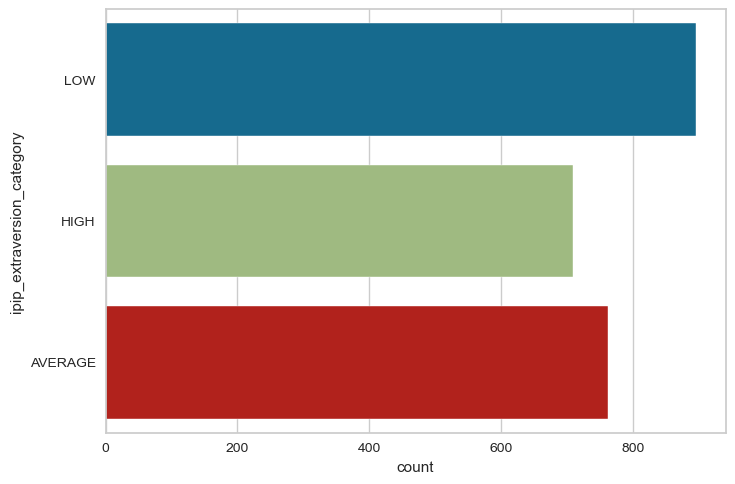

In [25]:
sns.countplot(y="ipip_extraversion_category", data=train_data)

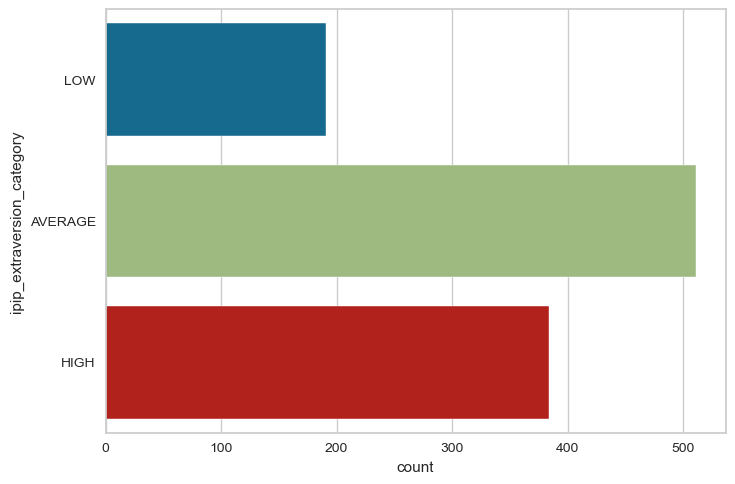

In [26]:
sns.countplot(y="ipip_extraversion_category", data=test_data)

In [27]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [28]:
s = setup(data=train_data, target='ipip_extraversion_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [29]:
best = compare_models(errors="raise")

In [30]:
best

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

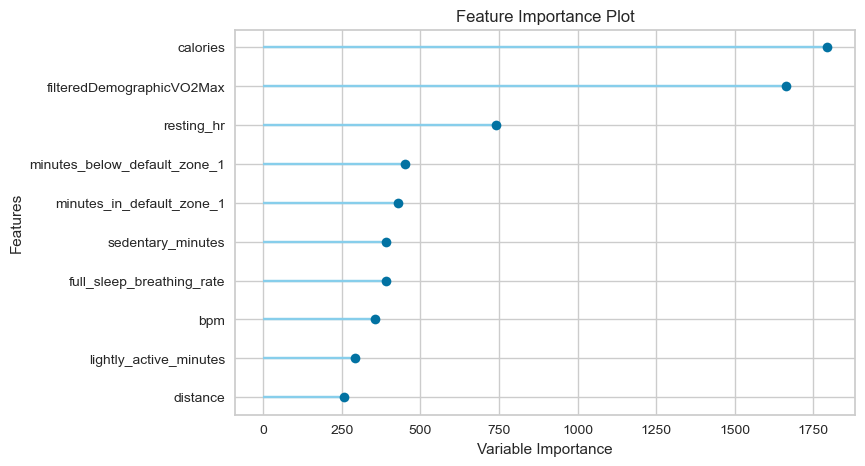

In [32]:
plot_model(best, plot='feature')

predict agreeableness

In [ ]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [35]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_conscientiousness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

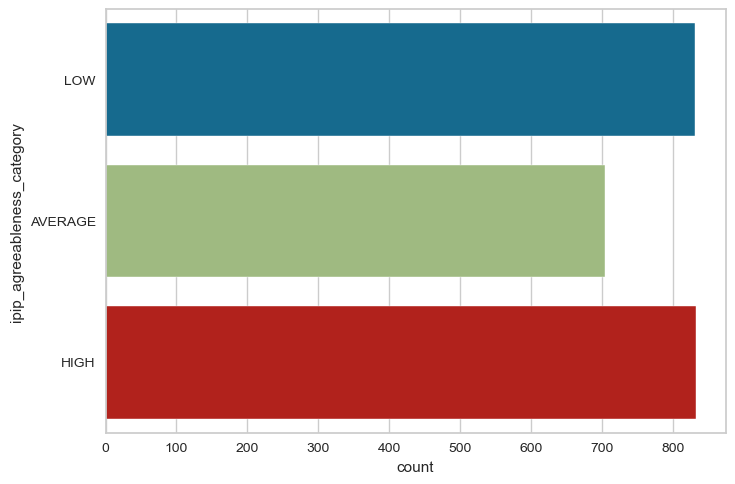

In [36]:
sns.countplot(y="ipip_agreeableness_category", data=train_data)

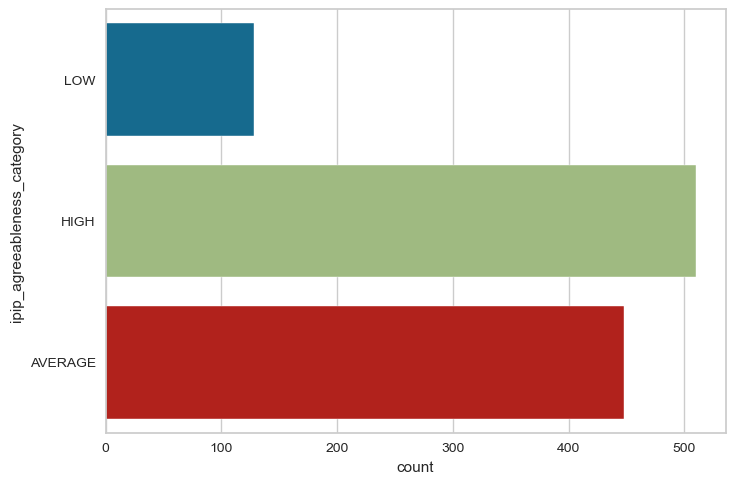

In [37]:
sns.countplot(y="ipip_agreeableness_category", data=test_data)

In [38]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [39]:
s = setup(data=train_data, target='ipip_agreeableness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [40]:
best = compare_models(errors="raise")

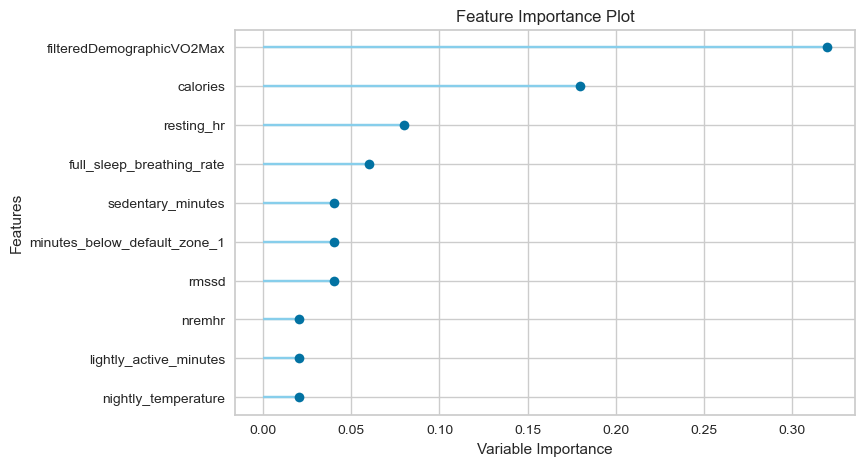

In [41]:
plot_model(best, plot='feature')

predict conscientiousness

In [2]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [3]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_stability_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

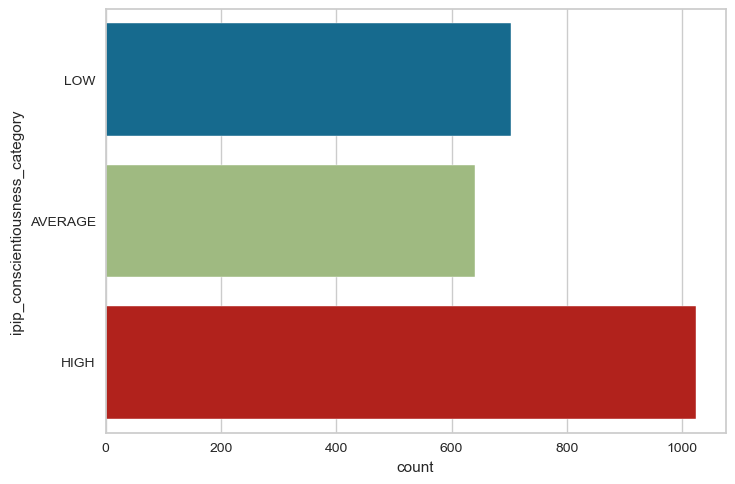

In [4]:
sns.countplot(y="ipip_conscientiousness_category", data=train_data)

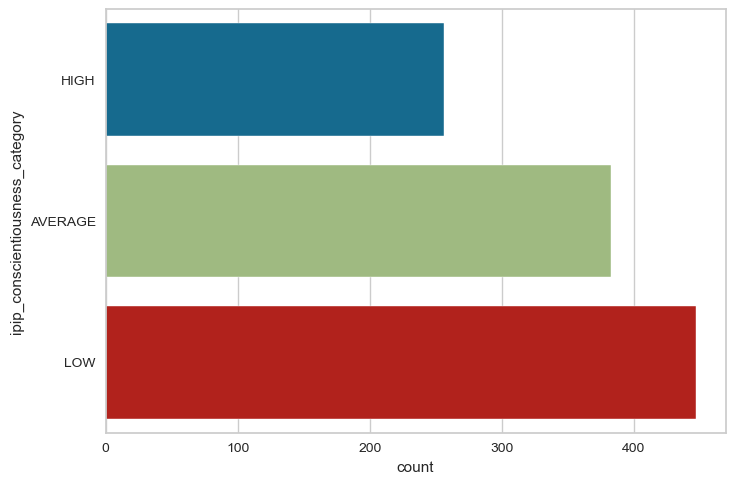

In [5]:
sns.countplot(y="ipip_conscientiousness_category", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [ ]:
s = setup(data=train_data, target='ipip_conscientiousness_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [ ]:
best = compare_models(errors="raise")

In [ ]:
best

In [ ]:
plot_model(best, plot='feature')

predict stability

In [18]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [19]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_intellect_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

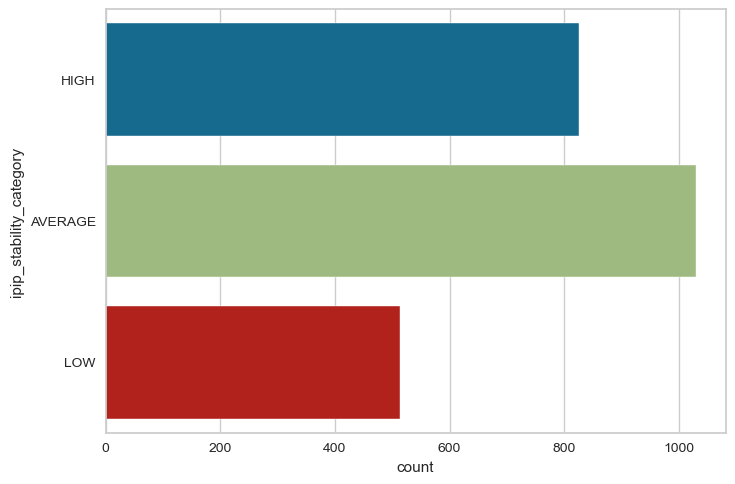

In [20]:
sns.countplot(y="ipip_stability_category", data=train_data)

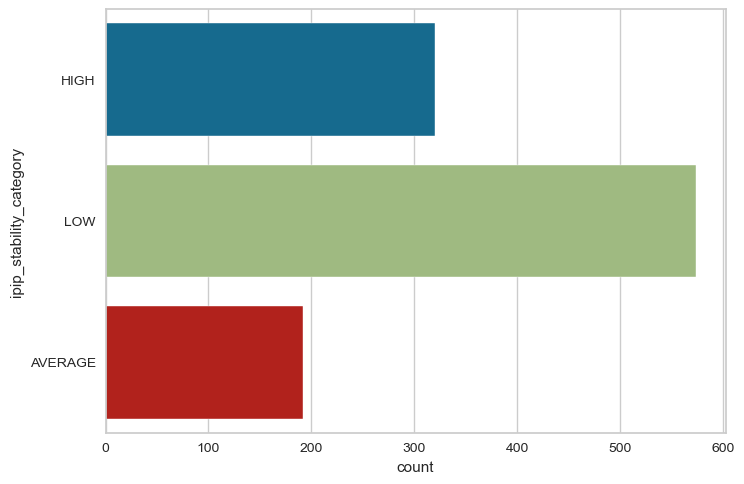

In [21]:
sns.countplot(y="ipip_stability_category", data=test_data)

In [22]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [ ]:
s = setup(data=train_data, target='ipip_stability_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [ ]:
best = compare_models(errors="raise")

In [ ]:
best

In [ ]:
plot_model(best, plot='feature')

predict intellect

In [2]:
data = pd.read_pickle('data/fitbit_personality_to_model.pkl')

In [3]:
data = data.drop(columns=['date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE', 'ipip_extraversion_category', 'ipip_agreeableness_category', 'ipip_conscientiousness_category', 'ipip_stability_category'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

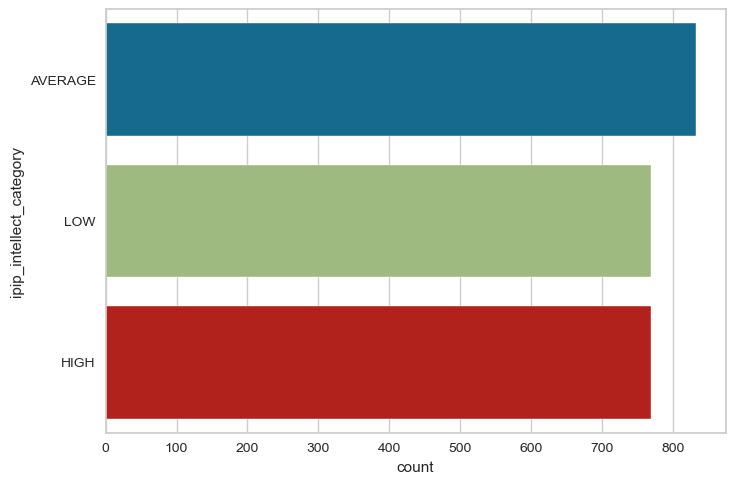

In [4]:
sns.countplot(y="ipip_intellect_category", data=train_data)

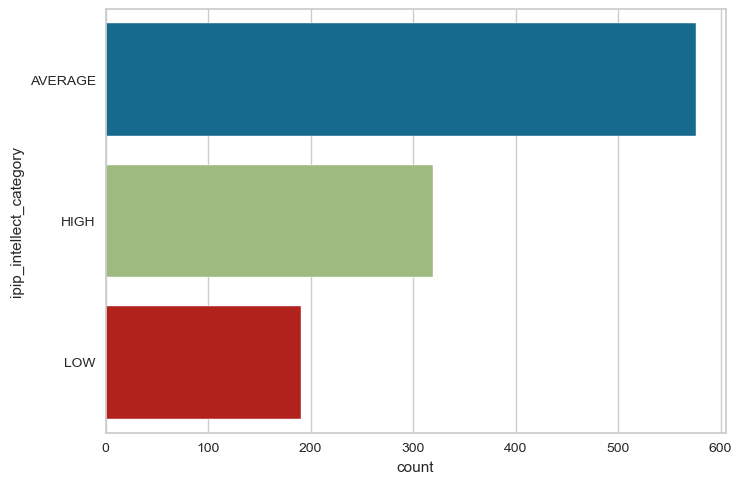

In [5]:
sns.countplot(y="ipip_intellect_category", data=test_data)

In [6]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [7]:
s = setup(data=train_data, target='ipip_intellect_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [8]:
best = compare_models(errors="raise")

In [9]:
best

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [10]:
plot_model(best, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.

Stai stress category prediction

In [25]:
data = pd.read_pickle('data/fitbit_stai_to_model.pkl')
data

id       date stai_stress stai_stress_category  \
0    621e2e8e67b776a24055b564 2021-05-31        45.0        Below average   
1    621e2e8e67b776a24055b564 2021-06-07        46.0              Average   
2    621e2e8e67b776a24055b564 2021-07-19        46.0              Average   
3    621e2e8e67b776a24055b564 2021-07-26        46.0              Average   
4    621e2e8e67b776a24055b564 2021-06-28        54.0        Above average   
..                        ...        ...         ...                  ...   
274  621e339967b776a240e502de 2021-11-22        49.0              Average   
275  621e339967b776a240e502de 2021-12-06        51.0        Above average   
276  621e339967b776a240e502de 2021-12-14        45.0        Below average   
277  621e339967b776a240e502de 2021-12-20        48.0              Average   
278  621e339967b776a240e502de 2022-01-12        49.0              Average   

    nightly_temperature  nremhr    rmssd  spo2 full_sleep_breathing_rate  \
0             34.408304  57.481   94.303   NaN                      14.8   
1             34.476865   56.57  109.509   NaN                      14.4   
2             34.254286   57.33  100.374   NaN                      15.0   
3             34.515655  59.798   98.515   NaN                      15.4   
4             34.418045  53.006  107.388   NaN                      15.6   
..                  ...     ...      ...   ...                       ...   
274                 NaN     NaN      NaN   NaN                       NaN   
275           34.674633  51.192   49.232  96.2                      12.2   
276           34.303759  46.311   56.468  96.5                      11.0   
277           34.876472  50.683   47.293  96.0                      11.6   
278           34.073346  51.364   51.324  96.1                      12.2   

    stress_score  ... Martial Arts  Run Spinning Sport Swim Treadmill Walk  \
0           81.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
1           83.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
2           75.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
3           74.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
4           76.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
..           ...  ...          ...  ...      ...   ...  ...       ...  ...   
274          NaN  ...          NaN  NaN      NaN   NaN  NaN       NaN  NaN   
275         83.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
276         87.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   
277         82.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  0.0   
278         84.0  ...          0.0  0.0      0.0   0.0  0.0       0.0  1.0   

    Weights Workout Yoga/Pilates  
0       0.0     0.0          0.0  
1       0.0     0.0          0.0  
2       0.0     0.0          0.0  
3       0.0     0.0          0.0  
4       0.0     0.0          0.0  
..      ...     ...          ...  
274     NaN     NaN          NaN  
275     0.0     0.0          0.0  
276     0.0     0.0          0.0  
277     0.0     0.0          0.0  
278     0.0     0.0          0.0  

[279 rows x 66 columns]

In [26]:
cols = list(data.columns)
removed_ele = ['id', 'date', 'stai_stress_category']
for ele in removed_ele:
    cols.remove(ele)
for column in cols:
    data[column] = pd.to_numeric(data[column])

In [27]:
data = data.drop(columns=['stai_stress', 'date', 'Normal', 'Obese', 'Overweight', 'Underweight', 'below_30s', 'above_30s', 'FEMALE', 'MALE'])
train_data, test_data = preprocessing_functions.train_test_split_per_user(data)

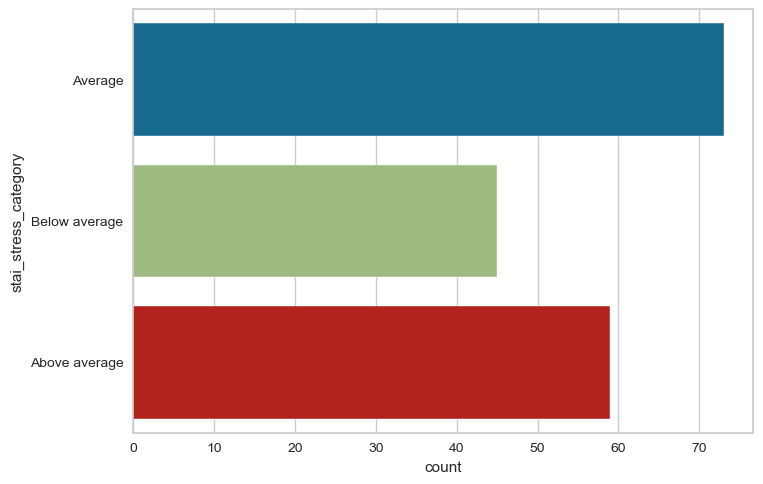

In [28]:
sns.countplot(y="stai_stress_category", data=train_data)

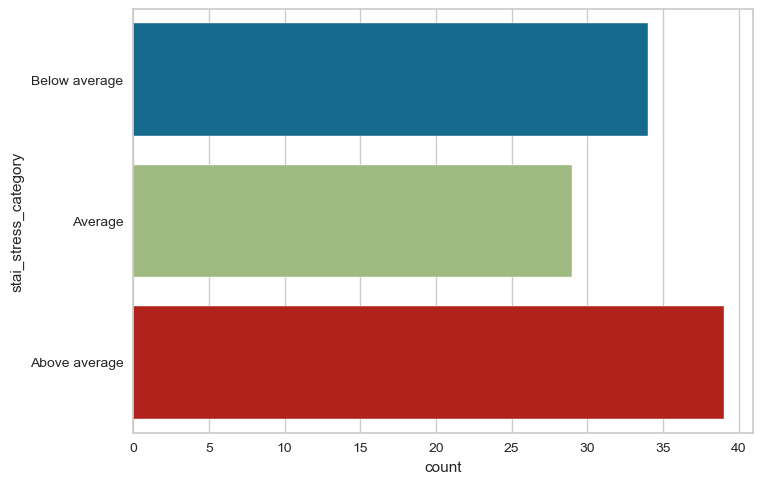

In [29]:
sns.countplot(y="stai_stress_category", data=test_data)

In [30]:
fold_groups = train_data.id
train_data = train_data.drop(columns=['id'])
test_data = test_data.drop(columns=['id'])

In [31]:
s = setup(data=train_data, target='stai_stress_category', silent=True, session_id=123, fold_strategy='groupkfold', fold=3,  fold_groups=fold_groups, test_data=test_data)

In [32]:
best = compare_models(errors="raise")

In [33]:
best

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
plot_model(best, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.